### Código em Python para detecção de fraude em anúncios de celulares na OLX


#### Etapa 1

Adquirindo um arquivo CSV com os dados

In [198]:
from sklearn import preprocessing
import pandas as pd

# Abrir a base de dados
tabela = pd.read_csv('data.csv')
display(tabela)


,Titulo,Descricao,Marca,Modelo,Condicao,Memoria,Cor,Bateria,Preco,Localizacao,Contato,Golpe
0,LG K10 Power,"Celular LG K10 Semi Novo,bateria 100%,tudo cer...",LG,K10 Power,Usado - Bom,32GB,Dourado,Perfeita (95% até 100%),400.0,28620-330,(22) 998779458,Sim
1,Samsung Galaxy S20,Celular Samsung Galaxy S20 Usado em Ótimo Estado.,Samsung,Galaxy S20,Usado - Ótimo,128GB,Preto,Perfeita (95% até 100%),500.0,10001-100,(11) 123456789,Sim
2,iPhone 11,"iPhone 11 em perfeito estado, com poucos meses...",Apple,iPhone 11,Usado - Excelente,64GB,Prateado,Perfeita (95% até 100%),600.0,20002-200,(22) 987654321,Sim
3,Xiaomi Redmi Note 8,"Xiaomi Redmi Note 8, 64GB, tela sem riscos.",Xiaomi,Redmi Note 8,Usado - Bom,64GB,Azul,Boa (80% até 95%),1250.0,30003-300,(33) 55556666,Não
4,OnePlus 7T,"Vendo OnePlus 7T em excelente estado, 128GB.",OnePlus,7T,Usado - Excelente,128GB,Cinza,Perfeita (95% até 100%),450.0,40004-400,(44) 11112222,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
76,Sony Xperia XA5,Sony Xperia XA5 em perfeitas condições.,Sony,Xperia XA5,Usado - Excelente,64GB,Vermelho,Perfeita (95% até 100%),300.0,76076-760,(76) 77778888,Não
77,Huawei P20 Lite,"Huawei P20 Lite, 128GB, em excelente estado.",Huawei,P20 Lite,Usado - Excelente,128GB,Dourado,Perfeita (95% até 100%),490.0,77077-770,(77) 99990000,Sim
78,Google Pixel 4 XL,"Google Pixel 4 XL em bom estado, 64GB.",Google,Pixel 4 XL,Usado - Bom,64GB,Preto,Boa (80% até 95%),270.0,78078-780,(78) 11113333,Não
79,Nokia 1.4,"Nokia 1.4, 32GB, em ótimas condições.",Nokia,1.4,Usado - Ótimo,32GB,Verde,Perfeita (95% até 100%),230.0,79079-790,(79) 44445555,Sim


#### Etapa 2

Codificando os dados em uma matriz de números inteiros, que irão ser utilizados nos algoritmos de classificação

In [199]:

enc = preprocessing.OrdinalEncoder()

codes = enc.fit(tabela)
transformedData = codes.transform(tabela)

resultData = pd.DataFrame(
    {
        "Titulo": transformedData[:, 0],
        "Descricao": transformedData[:, 1],
        "Marca": transformedData[:, 2],
        "Modelo": transformedData[:, 3],
        "Condicao": transformedData[:, 4],
        "Memoria": transformedData[:, 5],
        "Cor": transformedData[:, 6],
        "Bateria": transformedData[:, 7],	
        "Preco": transformedData[:, 8],
        "Localizacao": transformedData[:, 9],
        "Contato": transformedData[:, 10],
        "Golpe": transformedData[:, 11]
    }
)


#### Continuação - Etapa 2

Mostrando os dados transformados

    Titulo  Descricao  Marca  Modelo  Condicao  Memoria  Cor  Bateria  Preco  \
0     29.0        8.0    4.0    22.0       0.0      2.0  3.0      1.0   13.0   
1     55.0        9.0    8.0    20.0       2.0      0.0  5.0      1.0   17.0   
2     73.0       80.0    0.0    73.0       1.0      3.0  4.0      1.0   19.0   
3     71.0       78.0   10.0    55.0       0.0      3.0  0.0      0.0   20.0   
4     48.0       64.0    7.0     6.0       1.0      0.0  2.0      1.0   15.0   
..     ...        ...    ...     ...       ...      ...  ...      ...    ...   
76    62.0       61.0    9.0    64.0       1.0      3.0  7.0      1.0    8.0   
77    18.0       20.0    3.0    38.0       1.0      0.0  3.0      1.0   16.0   
78    12.0       13.0    2.0    48.0       0.0      3.0  5.0      0.0    6.0   
79    40.0       41.0    6.0     0.0       2.0      2.0  6.0      1.0    3.0   
80     3.0        3.0    1.0    68.0       0.0      0.0  0.0      0.0    9.0   

    Localizacao  Contato  Golpe  
0    

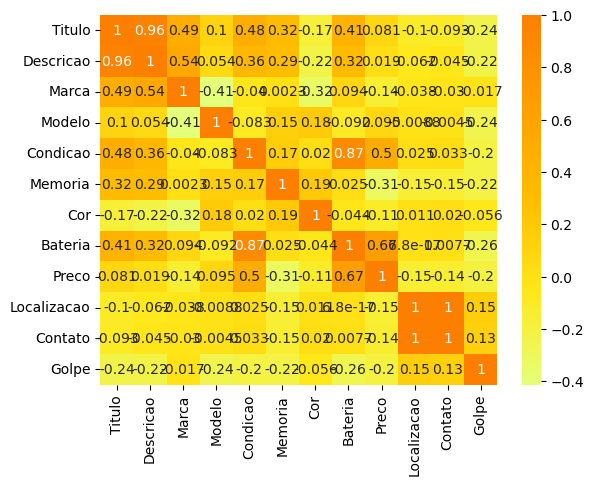

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

print(resultData)

# Análise preliminar
sns.heatmap(resultData.corr(), annot=True, cmap="Wistia")
plt.show()

#### Etapa 3

Criando um conjunto de teste e um de validação, usando a base de dados original.

In [201]:
# Machine learning
from sklearn.model_selection import train_test_split

# Dividir a base de dados em x e y de treino e de teste
y = resultData["Golpe"]
x = resultData[["Titulo", "Descricao", "Marca", "Modelo", "Condicao", "Memoria", "Cor", "Bateria", "Preco", "Localizacao", "Contato" ]]


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

#### Etapa 4

Usando os algoritmos de Regressão Linear e de Randon Forest para aprender os padrões dos dados utilizados

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics

# Criar os dois modelos de IAs
modelo_RegressãoLinear = LinearRegression()
modelo_RandomForest = RandomForestRegressor()
modelo_AdaBoost = AdaBoostRegressor()

# Treinar as duas IAs com o x e y de treino
modelo_RegressãoLinear.fit(x_treino, y_treino)
modelo_RandomForest.fit(x_treino, y_treino)
modelo_AdaBoost.fit(x_treino, y_treino)

# Testar as duas IAs e ver qual tem melhor desempenho no indice R²
previsao_RegressãoLinear = modelo_RegressãoLinear.predict(x_teste)
previsao_RandomForest = modelo_RandomForest.predict(x_teste)
previsao_AdaBoost = modelo_AdaBoost.predict(x_teste)

print(f'R² da Regressão Linear: {metrics.r2_score(y_teste, previsao_RegressãoLinear)}')
print(f'R² da Random Forest: {metrics.r2_score(y_teste, previsao_RandomForest)}') # Maior R² é RandomForest
print(f'R² da Ada Boost: {metrics.r2_score(y_teste, previsao_AdaBoost)}')

R² da Regressão Linear: 0.20715574731371733
R² da Random Forest: 0.5863572727272727
R² da Ada Boost: 0.7101285720852619


In [203]:
# Usar o modelo para prever novos dados
tabela_previsao = pd.read_csv('newData1.csv')

transformedData2 = codes.transform(tabela_previsao)
resultData2 = pd.DataFrame(
    {
        "Titulo": transformedData2[:, 0],
        "Descricao": transformedData2[:, 1],
        "Marca": transformedData2[:, 2],
        "Modelo": transformedData2[:, 3],
        "Condicao": transformedData2[:, 4],
        "Memoria": transformedData2[:, 5],
        "Cor": transformedData2[:, 6],
        "Bateria": transformedData2[:, 7],	
        "Preco": transformedData2[:, 8],
        "Localizacao": transformedData2[:, 9],
        "Contato": transformedData2[:, 10],
        "Golpe": transformedData2[:, 11]
    }
)

tabela_previsao['Golpe'] = modelo_RandomForest.predict(resultData2[["Titulo", "Descricao", "Marca", "Modelo", "Condicao", "Memoria", "Cor", "Bateria", "Preco", "Localizacao", "Contato"]])
display(tabela_previsao)


,Titulo,Descricao,Marca,Modelo,Condicao,Memoria,Cor,Bateria,Preco,Localizacao,Contato,Golpe
0,LG K10 Power,"Celular LG K10 Semi Novo,bateria 100%,tudo cer...",LG,K10 Power,Usado - Bom,32GB,Dourado,Perfeita (95% até 100%),400.0,28620-330,(22) 998779458,0.88
1,Samsung Galaxy S20,Celular Samsung Galaxy S20 Usado em Ótimo Estado.,Samsung,Galaxy S20,Usado - Ótimo,128GB,Preto,Perfeita (95% até 100%),500.0,10001-100,(11) 123456789,0.72
2,iPhone 11,"iPhone 11 em perfeito estado, com poucos meses...",Apple,iPhone 11,Usado - Excelente,64GB,Prateado,Perfeita (95% até 100%),600.0,20002-200,(22) 987654321,0.74
3,Xiaomi Redmi Note 8,"Xiaomi Redmi Note 8, 64GB, tela sem riscos.",Xiaomi,Redmi Note 8,Usado - Bom,64GB,Azul,Boa (80% até 95%),1250.0,30003-300,(33) 55556666,0.34
